In [2]:
sc.version

'2.4.5'

In [3]:
df66 = sqlContext.read.format('com.crealytics.spark.excel')\
.options(header='true', inferschema='true')\
.option("sheetName", "MOD66_2018")\
.option("location", 'MOD66_2018.xls')\
.option("useHeader", "true")\
.option("treatEmptyValuesAsNulls", "true")\
.option("inferSchema", "true")\
.option("addColorColumns", "False")\
.load()
df66.printSchema()

root
 |-- HHID: string (nullable = true)
 |-- CASEID: string (nullable = true)
 |-- V013: double (nullable = true)
 |-- V015: double (nullable = true)
 |-- V020: double (nullable = true)
 |-- V101: double (nullable = true)
 |-- V102: double (nullable = true)
 |-- V103: double (nullable = true)
 |-- V131: double (nullable = true)
 |-- V136: double (nullable = true)
 |-- V149: double (nullable = true)
 |-- V155: double (nullable = true)
 |-- V022: double (nullable = true)
 |-- V005: double (nullable = true)
 |-- V190: double (nullable = true)



In [7]:
# df.toPandas()

In [5]:
df66.createOrReplaceTempView("MOD66_2018")
df66b = spark.sql("SELECT HHID, CASEID, V013 from MOD66_2018 ") 
df66b.show()

+---------+------------+----+
|     HHID|      CASEID|V013|
+---------+------------+----+
|000100701|000100701  2| 6.0|
|000100701|000100701  3| 1.0|
|000101401|000101401  2| 2.0|
|000103501|000103501  4| 1.0|
|000103501|000103501  5| 0.0|
|000105301|000105301  2| 3.0|
|000107101|000107101  2| 5.0|
|000111301|000111301  1| 4.0|
|000112901|000112901  3| 3.0|
|000112901|000112901  4| 1.0|
|000112901|000112901  5| 4.0|
|000117801|000117801  2| 6.0|
|000117801|000117801  3| 0.0|
|000201101|000201101  2| 2.0|
|000205001|000205001  2| 7.0|
|000205001|000205001  3| 3.0|
|000205501|000205501  1| 2.0|
|000205501|000205501  2| 1.0|
|000206501|000206501  2| 3.0|
|000206701|000206701  3|null|
+---------+------------+----+
only showing top 20 rows



In [6]:
df73 = sqlContext.read.format('com.crealytics.spark.excel')\
.options(header='true', inferschema='true')\
.option("sheetName", "MOD73_2018")\
.option("location", 'MOD73_2018.xls')\
.option("useHeader", "true")\
.option("treatEmptyValuesAsNulls", "true")\
.option("inferSchema", "true")\
.option("addColorColumns", "False")\
.load()
df73.printSchema()

root
 |-- CASEID: string (nullable = true)
 |-- D104: double (nullable = true)
 |-- D105A: double (nullable = true)
 |-- D105B: double (nullable = true)
 |-- D105C: double (nullable = true)
 |-- D105D: double (nullable = true)
 |-- D105E: double (nullable = true)
 |-- D105F: double (nullable = true)
 |-- D105G: double (nullable = true)
 |-- D105H: double (nullable = true)
 |-- D105I: double (nullable = true)
 |-- D108: double (nullable = true)
 |-- D115B: double (nullable = true)
 |-- D115C: double (nullable = true)
 |-- D115F: double (nullable = true)
 |-- D115G: double (nullable = true)
 |-- D115H: double (nullable = true)
 |-- D115I: double (nullable = true)
 |-- D115M: double (nullable = true)
 |-- D115N: double (nullable = true)
 |-- D115S: double (nullable = true)
 |-- D115T: double (nullable = true)
 |-- D115V: double (nullable = true)
 |-- D115W: double (nullable = true)
 |-- D115XA: double (nullable = true)
 |-- D116: double (nullable = true)
 |-- D121: double (nullable = true

In [7]:
df73.createOrReplaceTempView("MOD73_2018")
df73b = spark.sql("SELECT CASEID, D104, D105A from MOD73_2018 ") 
df73b.show()

+------------+----+-----+
|      CASEID|D104|D105A|
+------------+----+-----+
|000100701  2| 0.0|  0.0|
|000100701  3|null| null|
|000101401  2| 0.0|  0.0|
|000103501  4|null| null|
|000105301  2| 0.0|  0.0|
|000107101  2| 0.0|  0.0|
|000111301  1| 0.0|  0.0|
|000112901  3|null| null|
|000112901  4|null| null|
|000112901  5|null| null|
|000117801  2| 1.0|  3.0|
|000201101  2| 0.0|  0.0|
|000205001  2|null| null|
|000205001  3|null| null|
|000205501  1|null| null|
|000205501  2|null| null|
|000206501  2| 0.0|  0.0|
|000206701  4|null| null|
|000206701  5|null| null|
|000211701  2| 0.0|  0.0|
+------------+----+-----+
only showing top 20 rows



In [8]:
#Integrar, selecconando, limpiando, transformando o formateano
"""
Merling Josue Ramirez Yugra
"""
df_f1 = spark.sql("SELECT p.CASEID, "
     "V013, V101, V102, V103, V131, V136, V149, V155, V190 "
     ",CASE (select sum (D115B+ D115C) FROM MOD73_2018 as tb where tb.CASEID= c.CASEID)  "
     " WHEN 0 THEN 0 ELSE 1 END AS MALTxFATHER "
     ",CASE (select sum (D105A + D105B + D105C + D105D+ D105E+ D105F+ D105G+ D105H+ D105I) from MOD73_2018 as tb "             
     " where tb.CASEID= c.CASEID) WHEN 0 THEN 0 ELSE 1 "
     " END AS PhisV "
     "FROM MOD66_2018 as p "
     "inner join MOD73_2018  as c on p.CASEID= c.CASEID "
     "WHERE (D115B IS NOT NULL) AND (D115C IS NOT NULL)  "
    "") 
print(df_f1.count())
df_f1.show()

26976
+------------+----+----+----+----+----+----+----+----+----+-----------+-----+
|      CASEID|V013|V101|V102|V103|V131|V136|V149|V155|V190|MALTxFATHER|PhisV|
+------------+----+----+----+----+----+----+----+----+----+-----------+-----+
|000600301  3| 3.0| 1.0| 1.0| 0.0|10.0| 6.0| 5.0| 2.0| 4.0|          0|    0|
|001508501  2| 3.0| 1.0| 1.0| 0.0|10.0| 3.0| 5.0| 2.0| 5.0|          0|    0|
|002901701  2| 5.0| 1.0| 2.0| 2.0| 4.0| 5.0| 4.0| 2.0| 1.0|          0|    0|
|008806001  4| 1.0| 2.0| 1.0| 2.0|10.0| 7.0| 3.0| 2.0| 4.0|          0|    1|
|011501501  2| 3.0| 2.0| 2.0| 2.0|10.0| 6.0| 2.0| 2.0| 1.0|          0|    0|
|011504101  2| 5.0| 2.0| 2.0| 3.0|10.0| 5.0| 1.0| 2.0| 1.0|          0|    1|
|016104501  4| 1.0| 3.0| 2.0| 2.0| 1.0| 7.0| 4.0| 2.0| 1.0|          0|    1|
|016411601  2| 3.0| 3.0| 2.0| 0.0|10.0| 5.0| 3.0| 2.0| 2.0|          0|    0|
|017200301  1| 4.0| 4.0| 1.0| 0.0|10.0| 4.0| 4.0| 2.0| 3.0|          0|    1|
|023410401  2| 2.0| 5.0| 1.0| 3.0|10.0| 3.0| 5.0| 2.0| 2.0

In [9]:
df_f1 = spark.sql("SELECT p.CASEID, "
     "V013, V101, V102, V103, V131, V136, V149, V155, V190 "
     
     ",CASE (select sum (D115B+ D115C) FROM MOD73_2018 as tb where tb.CASEID= c.CASEID)  "
     " WHEN 0 THEN 0 ELSE 1 END AS MALTxFATHER "
                  
    ",CASE (select sum (D115F+ D115G + D115H + D115I) FROM MOD73_2018 as tb where tb.CASEID= c.CASEID)  "
     " WHEN 0 THEN 0 ELSE 1 END AS MALTxFAM "
                  
    ",CASE (select sum (D115M + D115N) FROM MOD73_2018 as tb where tb.CASEID= c.CASEID)  "
     " WHEN 0 THEN 0 ELSE 1 END AS MALTxAPO "
    
    ",CASE (select sum (D115S + D115T + D115V + D115W + D115XA) FROM MOD73_2018 as tb where tb.CASEID= c.CASEID)  "
     " WHEN 0 THEN 0 ELSE 1 END AS MALTxOTHERS "
    
     ",D121 "
                  
     ",CASE (select sum (D105A + D105B + D105C + D105D+ D105E+ D105F+ D105G+ D105H+ D105I) from MOD73_2018 as tb "             
     " where tb.CASEID= c.CASEID) WHEN 0 THEN 'NO' ELSE 'SI' "
     " END AS PhisV "
     "FROM MOD66_2018 as p "
     "inner join MOD73_2018  as c on p.CASEID= c.CASEID "
     "WHERE (D115B IS NOT NULL) AND (D115C IS NOT NULL) "
                  "and D121 in (0,1) "
                  "and V103 in (0,1,2,3,4) "
  " and V131 in (1,2,3,4,5,6,7,8,9,10,11,12) "
  " and V136 <=15 "
  " and V155 in (0,1,2,3,4) "
  " and V190 in (1,2,3,4,5)"
    "") 
print(df_f1.count())
df_f1.show()

25977
+------------+----+----+----+----+----+----+----+----+----+-----------+--------+--------+-----------+----+-----+
|      CASEID|V013|V101|V102|V103|V131|V136|V149|V155|V190|MALTxFATHER|MALTxFAM|MALTxAPO|MALTxOTHERS|D121|PhisV|
+------------+----+----+----+----+----+----+----+----+----+-----------+--------+--------+-----------+----+-----+
|000600301  3| 3.0| 1.0| 1.0| 0.0|10.0| 6.0| 5.0| 2.0| 4.0|          0|       0|       0|          0| 0.0|   NO|
|001508501  2| 3.0| 1.0| 1.0| 0.0|10.0| 3.0| 5.0| 2.0| 5.0|          0|       0|       0|          0| 0.0|   NO|
|002901701  2| 5.0| 1.0| 2.0| 2.0| 4.0| 5.0| 4.0| 2.0| 1.0|          0|       0|       0|          0| 0.0|   NO|
|008806001  4| 1.0| 2.0| 1.0| 2.0|10.0| 7.0| 3.0| 2.0| 4.0|          0|       0|       0|          0| 0.0|   SI|
|011501501  2| 3.0| 2.0| 2.0| 2.0|10.0| 6.0| 2.0| 2.0| 1.0|          0|       0|       0|          1| 0.0|   NO|
|011504101  2| 5.0| 2.0| 2.0| 3.0|10.0| 5.0| 1.0| 2.0| 1.0|          0|       0|       0| 

In [10]:
df_f1.toPandas().head()

,CASEID,V013,V101,V102,V103,V131,V136,V149,V155,V190,MALTxFATHER,MALTxFAM,MALTxAPO,MALTxOTHERS,D121,PhisV
0,000600301 3,3.0,1.0,1.0,0.0,10.0,6.0,5.0,2.0,4.0,0,0,0,0,0.0,NO
1,001508501 2,3.0,1.0,1.0,0.0,10.0,3.0,5.0,2.0,5.0,0,0,0,0,0.0,NO
2,002901701 2,5.0,1.0,2.0,2.0,4.0,5.0,4.0,2.0,1.0,0,0,0,0,0.0,NO
3,008806001 4,1.0,2.0,1.0,2.0,10.0,7.0,3.0,2.0,4.0,0,0,0,0,0.0,SI
4,011501501 2,3.0,2.0,2.0,2.0,10.0,6.0,2.0,2.0,1.0,0,0,0,1,0.0,NO


In [11]:
df_f1.toPandas().isnull()

,CASEID,V013,V101,V102,V103,V131,V136,V149,V155,V190,MALTxFATHER,MALTxFAM,MALTxAPO,MALTxOTHERS,D121,PhisV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25975,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

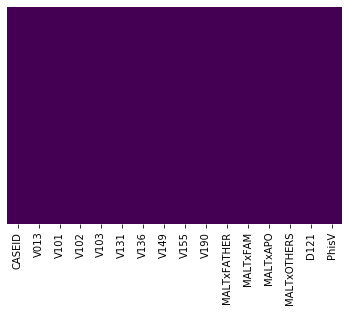

In [13]:
sns.heatmap(df_f1.toPandas().isnull(),yticklabels=False,cbar=False,cmap='viridis')

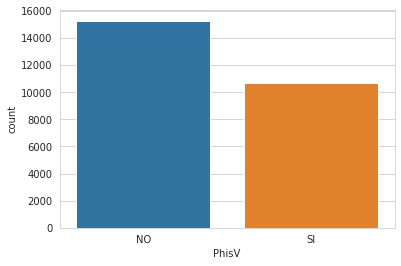

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='PhisV',data=df_f1.toPandas())

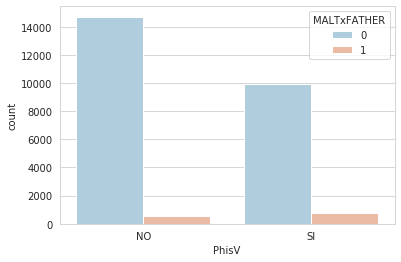

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='PhisV',hue='MALTxFATHER',data=df_f1.toPandas(),palette='RdBu_r')

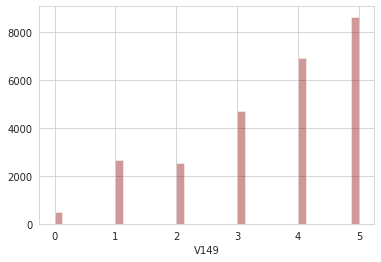

In [16]:
sns.distplot(df_f1.toPandas()['V149'].dropna(),kde=False,color='darkred',bins=40)
# CASEID|V013|V101|V102|V103|V131|V136|V149|V155|V190|MALTxFATHER|MALTxFAM|MALTxAPO|MALTxOTHERS|D121|PhisV

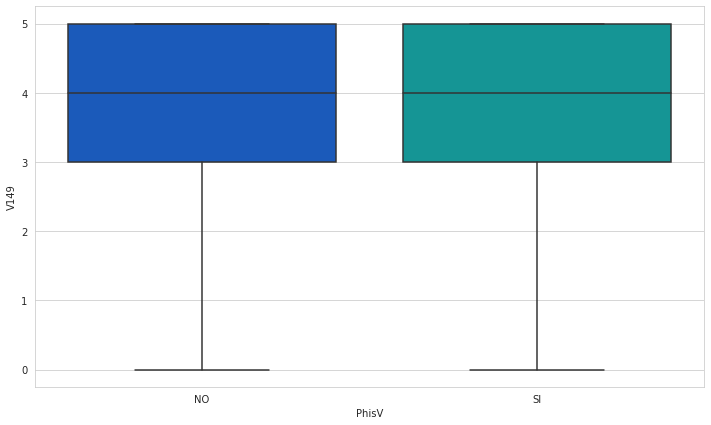

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='PhisV',y='V149',data=df_f1.toPandas(),palette='winter')

In [18]:

from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

stringIndexer = StringIndexer(inputCol = "PhisV", outputCol = "label")

# Solo para mostrar
modelx = stringIndexer.fit(df_f1)
indexedx = modelx.transform(df_f1)
indexedx.toPandas()

,CASEID,V013,V101,V102,V103,V131,V136,V149,V155,V190,MALTxFATHER,MALTxFAM,MALTxAPO,MALTxOTHERS,D121,PhisV,label
0,000600301 3,3.0,1.0,1.0,0.0,10.0,6.0,5.0,2.0,4.0,0,0,0,0,0.0,NO,0.0
1,001508501 2,3.0,1.0,1.0,0.0,10.0,3.0,5.0,2.0,5.0,0,0,0,0,0.0,NO,0.0
2,002901701 2,5.0,1.0,2.0,2.0,4.0,5.0,4.0,2.0,1.0,0,0,0,0,0.0,NO,0.0
3,008806001 4,1.0,2.0,1.0,2.0,10.0,7.0,3.0,2.0,4.0,0,0,0,0,0.0,SI,1.0
4,011501501 2,3.0,2.0,2.0,2.0,10.0,6.0,2.0,2.0,1.0,0,0,0,1,0.0,NO,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,317301601 4,1.0,24.0,1.0,1.0,10.0,5.0,4.0,2.0,2.0,0,0,0,0,0.0,NO,0.0
25973,319904501 2,7.0,25.0,1.0,0.0,10.0,3.0,5.0,2.0,4.0,0,0,0,0,0.0,NO,0.0
25974,320113301 2,5.0,25.0,1.0,0.0,10.0,3.0,5.0,2.0,3.0,0,0,0,0,0.0,NO,0.0
25975,322905401 1,3.0,25.0,1.0,2.0,10.0,4.0,4.0,2.0,2.0,0,0,0,0,0.0,NO,0.0


In [19]:
from pyspark.ml.feature import VectorAssembler
car= ['V013','V101','V102','V103','V131','V136','V149','V155','V190','MALTxFATHER','MALTxFAM','MALTxAPO','MALTxOTHERS','D121']
vecAssembler = VectorAssembler(inputCols=car, outputCol="features")

dfa = vecAssembler.transform(df_f1) # this will add to the table outputCol column with vectors.
dfa.show()# dfa ya no es necesario, ahora se encarga Pipeline

+------------+----+----+----+----+----+----+----+----+----+-----------+--------+--------+-----------+----+-----+--------------------+
|      CASEID|V013|V101|V102|V103|V131|V136|V149|V155|V190|MALTxFATHER|MALTxFAM|MALTxAPO|MALTxOTHERS|D121|PhisV|            features|
+------------+----+----+----+----+----+----+----+----+----+-----------+--------+--------+-----------+----+-----+--------------------+
|000600301  3| 3.0| 1.0| 1.0| 0.0|10.0| 6.0| 5.0| 2.0| 4.0|          0|       0|       0|          0| 0.0|   NO|(14,[0,1,2,4,5,6,...|
|001508501  2| 3.0| 1.0| 1.0| 0.0|10.0| 3.0| 5.0| 2.0| 5.0|          0|       0|       0|          0| 0.0|   NO|(14,[0,1,2,4,5,6,...|
|002901701  2| 5.0| 1.0| 2.0| 2.0| 4.0| 5.0| 4.0| 2.0| 1.0|          0|       0|       0|          0| 0.0|   NO|[5.0,1.0,2.0,2.0,...|
|008806001  4| 1.0| 2.0| 1.0| 2.0|10.0| 7.0| 3.0| 2.0| 4.0|          0|       0|       0|          0| 0.0|   SI|[1.0,2.0,1.0,2.0,...|
|011501501  2| 3.0| 2.0| 2.0| 2.0|10.0| 6.0| 2.0| 2.0| 1.0|   

In [20]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[vecAssembler, stringIndexer])
# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(df_f1)
dataset = pipelineFit.transform(df_f1)
dataset.show(5)

+------------+----+----+----+----+----+----+----+----+----+-----------+--------+--------+-----------+----+-----+--------------------+-----+
|      CASEID|V013|V101|V102|V103|V131|V136|V149|V155|V190|MALTxFATHER|MALTxFAM|MALTxAPO|MALTxOTHERS|D121|PhisV|            features|label|
+------------+----+----+----+----+----+----+----+----+----+-----------+--------+--------+-----------+----+-----+--------------------+-----+
|000600301  3| 3.0| 1.0| 1.0| 0.0|10.0| 6.0| 5.0| 2.0| 4.0|          0|       0|       0|          0| 0.0|   NO|(14,[0,1,2,4,5,6,...|  0.0|
|001508501  2| 3.0| 1.0| 1.0| 0.0|10.0| 3.0| 5.0| 2.0| 5.0|          0|       0|       0|          0| 0.0|   NO|(14,[0,1,2,4,5,6,...|  0.0|
|002901701  2| 5.0| 1.0| 2.0| 2.0| 4.0| 5.0| 4.0| 2.0| 1.0|          0|       0|       0|          0| 0.0|   NO|[5.0,1.0,2.0,2.0,...|  0.0|
|008806001  4| 1.0| 2.0| 1.0| 2.0|10.0| 7.0| 3.0| 2.0| 4.0|          0|       0|       0|          0| 0.0|   SI|[1.0,2.0,1.0,2.0,...|  1.0|
|011501501  2| 3.0| 

In [4]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

stringIndexer = StringIndexer(inputCol = "Species", outputCol = "label")

# Solo para mostrar
modelx = stringIndexer.fit(df2)
indexedx = modelx.transform(df2)
#type(modelx)

NameError: name 'df2' is not defined